<a href="https://colab.research.google.com/github/PRITIKA10/DSBDAL/blob/main/Assignment10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Analytics III
1. Implement Simple Naïve Bayes classification algorithm using Python/R on iris.csv
dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision,
Recall on the given dataset.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [ ]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
mapping = {
    "Iris-setosa": 0,
    "Iris-versicolor": 1,
    "Iris-virginica": 2,
}

In [ ]:
df['Species'] = df['Species'].replace(mapping)

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [ ]:
corr = df.corr()

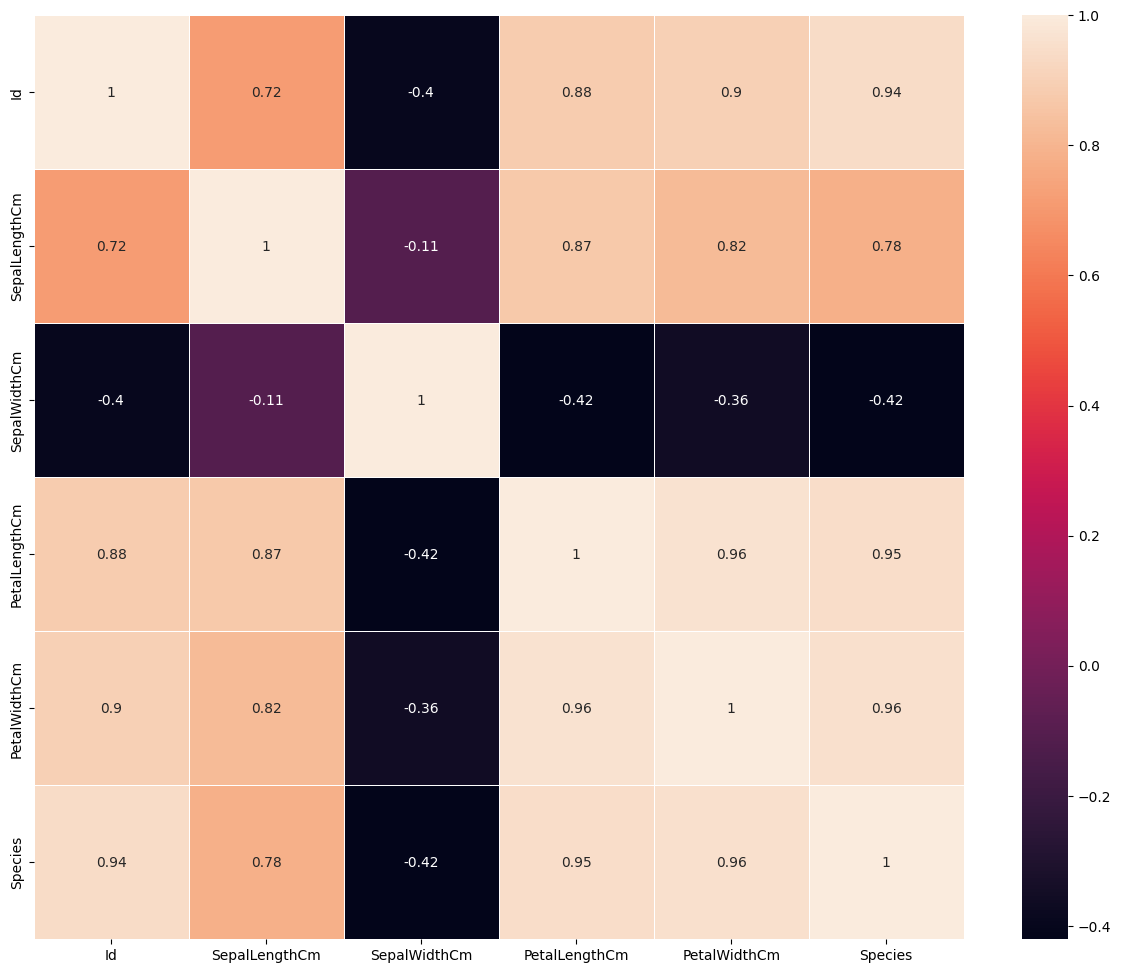

In [ ]:
plt.figure(figsize = (15,12))

sns.heatmap(corr, annot = True, linewidth = 0.5)
plt.show()

In [ ]:
X = df.drop("Species", axis = 1).values
y = df.Species.values

In [ ]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
clf = GaussianNB()

In [ ]:
clf.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_preds = clf.predict(X_test)
y_preds

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
cm = confusion_matrix(y_test, y_preds)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [ ]:
TP = cm[1, 1]  # True Positives
TN = cm[0, 0] + cm[2, 2]  # True Negatives
FP = cm[0, 1] + cm[0, 2] + cm[1, 0] + cm[2, 0] + cm[2, 1]  # False Positives
FN = cm[1, 0] + cm[1, 2] + cm[0, 1] + cm[2, 1] + cm[0, 2]  # False Negatives

In [ ]:
accuracy = (TP + TN) / len(y_test)
error_rate = (FP + FN) / len(y_test)
precision = TP / (TP + FP)
recall = TP / (TP + FN)

print("Accuracy:", accuracy)
print("Error rate:", error_rate)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 1.0
Error rate: 0.0
Precision: 1.0
Recall: 1.0
